# Assignment No 12 : TensorFlow and Keras: Build various MLP architectures for MNIST Dataset

### Resources :

- Thanks AAIC Team
- Google Search ,Kaggle,Sklearn
- KrushitReddy
- https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3407/exercise-try-different-mlp-architectures-on-mnist-dataset/8/module-8-neural-networks-computer-vision-and-deep-learning
- https://github.com/krushithreddy
- https://scikit-learn.org/stable/index.html
- https://www.kaggle.com/

In [1]:
# Importing Libraries

import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

C:\Users\Sohail\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1783339991702152395
]


In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
import seaborn as sns

Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [5]:
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x,vy,'b',label="Validation Loss")
  ax.plot(x,ty,'r',label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 149s 13us/step


In [7]:
print("Number of training examples:",X_train.shape[0],"; each image is of shape (%d,%d)"%(X_train.shape[1],X_train.shape[2]))
print("Number of training examples:",X_test.shape[0],"; each image is of shape (%d,%d)"%(X_test.shape[1],X_test.shape[2]))

Number of training examples: 60000 ; each image is of shape (28,28)
Number of training examples: 10000 ; each image is of shape (28,28)


In [8]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [9]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [10]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255
#since Xmin=0
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
# here we are having a class number for each image
print("Class label of first image :", y_train[3])

Class label of first image : 1


In [13]:
# lets convert this into a 10 dimensional vector

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[3])

After converting the output into a vector :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [15]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 100 
nb_epoch = 60

# ** Architecture-1: input (784) - ReLu(512) - ReLu(256) - sigmoid**

## **1.MLP + Batch-Norm on hidden Layers + AdamOptimizer**

In [15]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 538,890
Trainable params: 537,354
Non-trainable params: 1,536
_________________________________________________________________


In [16]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 7s 114us/step - loss: 0.1799 - acc: 0.9454 - val_loss: 0.1045 - val_acc: 0.9657
Epoch 2/60
60000/60000 [==============================] - 5s 90us/step - loss: 0.0731 - acc: 0.9780 - val_loss: 0.0836 - val_acc: 0.9746
Epoch 3/60
60000/60000 [==============================] - 5s 91us/step - loss: 0.0486 - acc: 0.9852 - val_loss: 0.0749 - val_acc: 0.9762
Epoch 4/60
60000/60000 [==============================] - 6s 92us/step - loss: 0.0352 - acc: 0.9889 - val_loss: 0.0753 - val_acc: 0.9784
Epoch 5/60
60000/60000 [==============================] - 5s 91us/step - loss: 0.0274 - acc: 0.9914 - val_loss: 0.0767 - val_acc: 0.9761
Epoch 6/60
60000/60000 [==============================] - 5s 91us/step - loss: 0.0230 - acc: 0.9928 - val_loss: 0.0727 - val_acc: 0.9773
Epoch 7/60
60000/60000 [==============================] - 5s 91us/step - loss: 

Test score: 0.09192510834604554
Test accuracy: 0.983


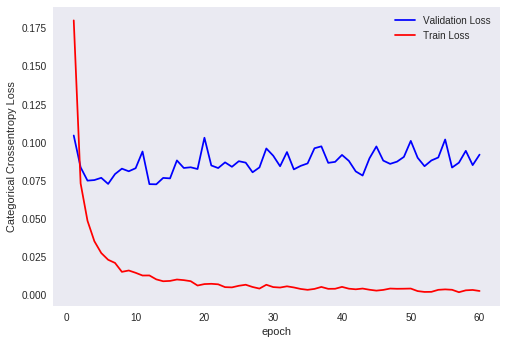

In [17]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **2. MLP + Dropout + AdamOptimizer**

In [18]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
___________________________

In [19]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 6s 106us/step - loss: 0.4528 - acc: 0.8622 - val_loss: 0.1598 - val_acc: 0.9525
Epoch 2/60
60000/60000 [==============================] - 6s 95us/step - loss: 0.2362 - acc: 0.9277 - val_loss: 0.1314 - val_acc: 0.9566
Epoch 3/60
60000/60000 [==============================] - 6s 94us/step - loss: 0.1886 - acc: 0.9425 - val_loss: 0.1041 - val_acc: 0.9666
Epoch 4/60
60000/60000 [==============================] - 6s 94us/step - loss: 0.1674 - acc: 0.9488 - val_loss: 0.0946 - val_acc: 0.9697
Epoch 5/60
60000/60000 [==============================] - 6s 95us/step - loss: 0.1496 - acc: 0.9544 - val_loss: 0.0869 - val_acc: 0.9725
Epoch 6/60
60000/60000 [==============================] - 6s 95us/step - loss: 0.1377 - acc: 0.9582 - val_loss: 0.0780 - val_acc: 0.9757
Epoch 7/60
60000/60000 [==============================] - 6s 95us/step - loss: 0.1264 - acc: 0.9608 - val_loss: 0.0774 - val_ac

Test score: 0.05668292018135808
Test accuracy: 0.9855


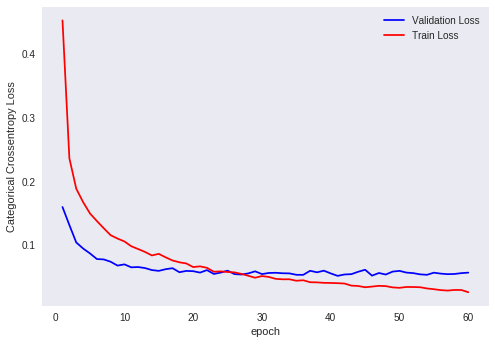

In [20]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# **Architecture-2: input (784) - ReLu(1024) - ReLu(512)-Relu(256)- sigmoid**

##**1.MLP + Batch-Norm on hidden Layers + AdamOptimizer**

In [22]:
model_batch = Sequential()

model_batch.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              803840    
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total para

In [23]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 9s 154us/step - loss: 0.1723 - acc: 0.9483 - val_loss: 0.1034 - val_acc: 0.9691
Epoch 2/60
60000/60000 [==============================] - 8s 136us/step - loss: 0.0668 - acc: 0.9799 - val_loss: 0.0872 - val_acc: 0.9740
Epoch 3/60
60000/60000 [==============================] - 8s 137us/step - loss: 0.0433 - acc: 0.9868 - val_loss: 0.0809 - val_acc: 0.9742
Epoch 4/60
60000/60000 [==============================] - 8s 136us/step - loss: 0.0344 - acc: 0.9887 - val_loss: 0.0768 - val_acc: 0.9786
Epoch 5/60
60000/60000 [==============================] - 8s 136us/step - loss: 0.0257 - acc: 0.9920 - val_loss: 0.0860 - val_acc: 0.9752
Epoch 6/60
60000/60000 [==============================] - 8s 136us/step - loss: 0.0228 - acc: 0.9925 - val_loss: 0.0829 - val_acc: 0.9747
Epoch 7/60
60000/60000 [==============================] - 8s 137us/step - loss: 0.0195 - acc: 0.9933 - val_loss: 0.0635 - 

Test score: 0.05668292018135808
Test accuracy: 0.9855


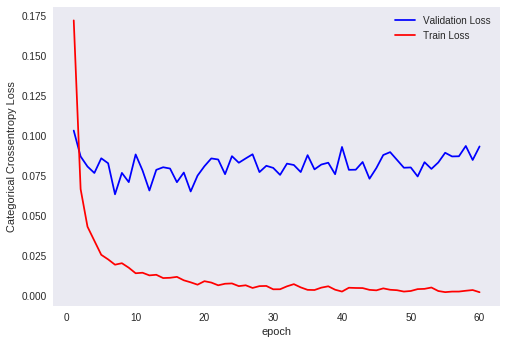

In [24]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **2. MLP + Dropout + AdamOptimizer**

In [25]:
model_drop = Sequential()

model_drop.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
__________

In [26]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 10s 164us/step - loss: 0.5917 - acc: 0.8182 - val_loss: 0.1716 - val_acc: 0.9440
Epoch 2/60
60000/60000 [==============================] - 8s 141us/step - loss: 0.2722 - acc: 0.9175 - val_loss: 0.1379 - val_acc: 0.9550
Epoch 3/60
60000/60000 [==============================] - 8s 140us/step - loss: 0.2157 - acc: 0.9360 - val_loss: 0.1088 - val_acc: 0.9644
Epoch 4/60
60000/60000 [==============================] - 8s 140us/step - loss: 0.1818 - acc: 0.9452 - val_loss: 0.1062 - val_acc: 0.9663
Epoch 5/60
60000/60000 [==============================] - 8s 139us/step - loss: 0.1587 - acc: 0.9517 - val_loss: 0.0955 - val_acc: 0.9708
Epoch 6/60
60000/60000 [==============================] - 8s 141us/step - loss: 0.1448 - acc: 0.9564 - val_loss: 0.0857 - val_acc: 0.9725
Epoch 7/60
60000/60000 [==============================] - 8s 140us/step - loss: 0.1328 - acc: 0.9600 - val_loss: 0.0751 -

Test score: 0.059668766928038346
Test accuracy: 0.9864


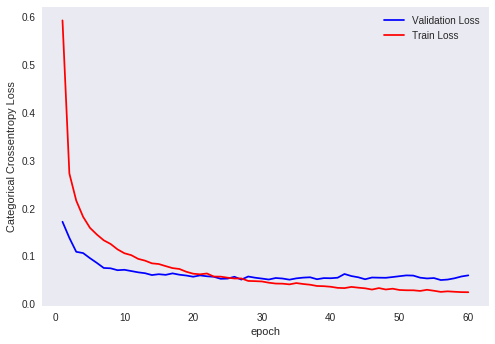

In [27]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# **Architecture 3: input (784) - ReLu(1024) - ReLu(512)-Relu(256)-Relu(128)-Relu(64)- sigmoid**

## **1.MLP + Batch-Norm on hidden Layers + AdamOptimizer**

In [28]:
model_batch = Sequential()

model_batch.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_11 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
__________

In [29]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 13s 224us/step - loss: 0.2293 - acc: 0.9339 - val_loss: 0.1111 - val_acc: 0.9653
Epoch 2/60
60000/60000 [==============================] - 11s 187us/step - loss: 0.0847 - acc: 0.9743 - val_loss: 0.1002 - val_acc: 0.9690
Epoch 3/60
60000/60000 [==============================] - 11s 187us/step - loss: 0.0593 - acc: 0.9812 - val_loss: 0.0974 - val_acc: 0.9710
Epoch 4/60
60000/60000 [==============================] - 11s 188us/step - loss: 0.0459 - acc: 0.9853 - val_loss: 0.0895 - val_acc: 0.9747
Epoch 5/60
60000/60000 [==============================] - 11s 189us/step - loss: 0.0373 - acc: 0.9883 - val_loss: 0.0884 - val_acc: 0.9751
Epoch 6/60
60000/60000 [==============================] - 11s 183us/step - loss: 0.0317 - acc: 0.9899 - val_loss: 0.0764 - val_acc: 0.9782
Epoch 7/60
60000/60000 [==============================] - 11s 186us/step - loss: 0.0276 - acc: 0.9911 - val_loss: 0.

Test score: 0.059668766928038346
Test accuracy: 0.9864


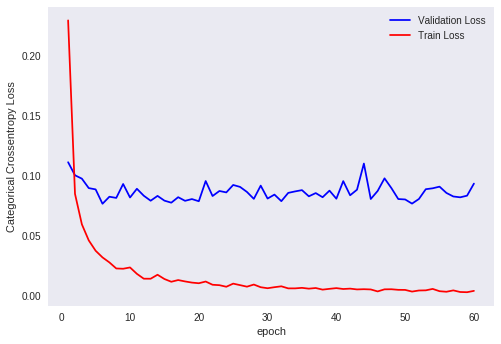

In [30]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **2. MLP + Dropout + AdamOptimizer**

In [31]:
model_drop = Sequential()

model_drop.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_16 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
__________

In [36]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 14s 234us/step - loss: 1.6017 - acc: 0.4863 - val_loss: 0.3765 - val_acc: 0.9044
Epoch 2/60
60000/60000 [==============================] - 11s 189us/step - loss: 0.6338 - acc: 0.8033 - val_loss: 0.2279 - val_acc: 0.9319
Epoch 3/60
60000/60000 [==============================] - 11s 189us/step - loss: 0.4424 - acc: 0.8710 - val_loss: 0.1846 - val_acc: 0.9499
Epoch 4/60
60000/60000 [==============================] - 11s 189us/step - loss: 0.3453 - acc: 0.9036 - val_loss: 0.1547 - val_acc: 0.9566
Epoch 5/60
60000/60000 [==============================] - 11s 189us/step - loss: 0.2850 - acc: 0.9216 - val_loss: 0.1354 - val_acc: 0.9623
Epoch 6/60
60000/60000 [==============================] - 11s 188us/step - loss: 0.2492 - acc: 0.9336 - val_loss: 0.1176 - val_acc: 0.9680
Epoch 7/60
60000/60000 [==============================] - 11s 189us/step - loss: 0.2317 - acc: 0.9369 - val_loss: 0.

Test score: 0.06261478376485174
Test accuracy: 0.9873


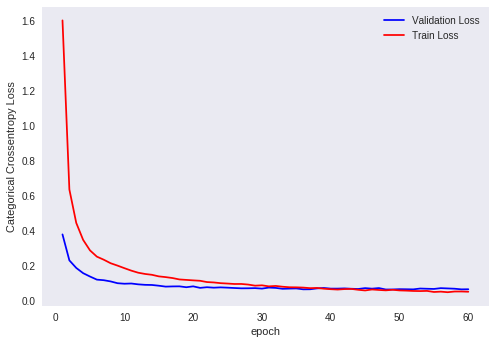

In [37]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

vy = h istory.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclution :

In [17]:
from prettytable import PrettyTable

In [24]:
x = PrettyTable()

x.field_names = ["Architecture","Model","Test_Score", "Test_Accuracy", "Epochs"]

x.add_row(["1 : 784-512-256 Sigmoid","MLP + BN + Adam Opt","0.091","0.983"," >60"])
x.add_row(["1 : 784-512-256 Sigmoid","MLP + AdamOpt + Dropout","0.056","0.985","24"])
x.add_row(["2 : 784-1024-512-256 Sigmoid","MLP + BN + Adam Opt","0.056","0.985"," >60"])
x.add_row(["2 : 784-1024-512-256 Sigmoid","BN with Dropout","0.059","0.986","23"])
x.add_row(["3 : 784-1024-512-256-128 Sigmoid","MLP + BN + Adam Opt","0.059","0.986"," >60"])
x.add_row(["3 : 784-1024-512-256-128 Sigmoid","MLP + AdamOpt + Dropout","0.062","0.987","31"])

print(x)

+----------------------------------+-------------------------+------------+---------------+--------+
|           Architecture           |          Model          | Test_Score | Test_Accuracy | Epochs |
+----------------------------------+-------------------------+------------+---------------+--------+
|     1 : 784-512-256 Sigmoid      |   MLP + BN + Adam Opt   |   0.091    |     0.983     |   >60  |
|     1 : 784-512-256 Sigmoid      | MLP + AdamOpt + Dropout |   0.056    |     0.985     |   24   |
|   2 : 784-1024-512-256 Sigmoid   |   MLP + BN + Adam Opt   |   0.056    |     0.985     |   >60  |
|   2 : 784-1024-512-256 Sigmoid   |     BN with Dropout     |   0.059    |     0.986     |   23   |
| 3 : 784-1024-512-256-128 Sigmoid |   MLP + BN + Adam Opt   |   0.059    |     0.986     |   >60  |
| 3 : 784-1024-512-256-128 Sigmoid | MLP + AdamOpt + Dropout |   0.062    |     0.987     |   31   |
+----------------------------------+-------------------------+------------+---------------+